Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import generate_index_dictionary
import return_track_attributes
import display_tracks
index_dictionary = generate_index_dictionary.return_index_dictionary()

# load files

In [3]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [4]:
experiment = 'ada_wildtype'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_wt = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_wt = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_wt = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))

print(len(experiment_number_arpc3_positive_sigdnm2_wt),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt), 
      len(absolute_ap2_x_position_arpc3_positive_wt))

1385 1385 1385


In [5]:
experiment = 'ada_ck666_nt'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_ck666_nt = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_ck666_nt = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_ck666_nt = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))

print(len(experiment_number_arpc3_positive_sigdnm2_ck666_nt),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt), 
      len(absolute_ap2_x_position_arpc3_positive_ck666_nt))

1352 1352 1352


In [6]:
experiment = 'ada_hypotonic_before'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_hypotonic_before = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_hypotonic_before = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_hypotonic_before = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))

print(len(experiment_number_arpc3_positive_sigdnm2_hypotonic_before),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before), 
      len(absolute_ap2_x_position_arpc3_positive_hypotonic_before))

1175 1175 1175


In [7]:
exp_num_merged = experiment_number_arpc3_positive_sigdnm2_wt + experiment_number_arpc3_positive_sigdnm2_ck666_nt + experiment_number_arpc3_positive_sigdnm2_hypotonic_before
separation_merged = ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt + ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt + ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before
absolute_x_merged = absolute_ap2_x_position_arpc3_positive_wt + absolute_ap2_x_position_arpc3_positive_ck666_nt + absolute_ap2_x_position_arpc3_positive_hypotonic_before
absolute_y_merged = absolute_ap2_y_position_arpc3_positive_wt + absolute_ap2_y_position_arpc3_positive_ck666_nt + absolute_ap2_y_position_arpc3_positive_hypotonic_before


In [8]:
image_size = 512
center_offset = 50
spacing = 5
min_x = np.arange(image_size/2-center_offset, 0, -spacing)
min_y = np.arange(image_size/2-center_offset, 0, -spacing)
max_x = np.arange(image_size/2+center_offset, image_size, spacing)
max_y = np.arange(image_size/2+center_offset, image_size, spacing)

In [9]:
events_in_boundary = []
boundary_condition = []
separation = []
experiment_number = []

for i in range(len(min_x)):
    
    events_temp = []
    
    current_boundaries = (min_x[i], 
                          min_y[i],
                          max_x[i],
                          max_y[i])
    
    for j in range(len(absolute_x_merged)):
        
        in_bounds = True
        
        x_pos_temp = absolute_x_merged[j]
        
        for x_pos in x_pos_temp:
            
            if x_pos<current_boundaries[0] or x_pos>current_boundaries[2]:
                
                in_bounds = False
            
        y_pos_temp = absolute_y_merged[j]
        
        for y_pos in y_pos_temp:
            
            if y_pos<current_boundaries[1] or y_pos>current_boundaries[3]:
                
                in_bounds = False
        
        if in_bounds:
            
            boundary_condition.append(i)
            separation.append(separation_merged[j])
            experiment_number.append(exp_num_merged[j])

            events_temp.append(separation_merged[j])
            
    events_in_boundary.append(events_temp)

In [10]:
df_array = np.array((boundary_condition, separation, experiment_number)).T

In [11]:
df_boundaries = pd.DataFrame(df_array, columns=['boundary', 'separation', 'experiment_number'])

In [12]:
df_boundaries

,boundary,separation,experiment_number
0,0.0,0.091455,8.0
1,0.0,0.053945,8.0
2,0.0,0.105760,8.0
3,0.0,0.138754,8.0
4,0.0,0.333637,8.0
...,...,...,...
71180,41.0,0.389715,70.0
71181,41.0,0.032813,70.0
71182,41.0,0.019403,70.0
71183,41.0,0.000000,70.0


In [13]:
# plt.rcParams['figure.dpi']=200
# plt.rcParams['figure.figsize']=(10,10)
# sns.stripplot(data=df_boundaries,
#               x = 'boundary',
#               y = 'separation',
#               hue='experiment_number')

In [14]:
avg_sep = []
std_sep = []
num_events = []
for i in range(len(events_in_boundary)):
    num_events.append(len(events_in_boundary[i]))
    avg_sep.append(np.mean(events_in_boundary[i]))
    std_sep.append(np.std(events_in_boundary[i]))

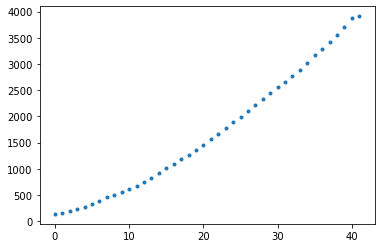

In [15]:
plt.plot(num_events, '.')

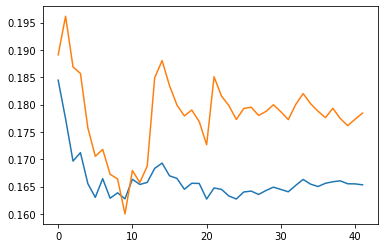

In [16]:
plt.plot(avg_sep)
plt.plot(std_sep)

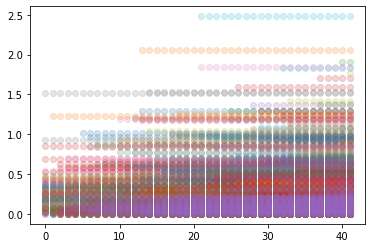

In [17]:
for exp in set(df_boundaries['experiment_number']):
    df_boundaries_temp = df_boundaries[df_boundaries['experiment_number']==exp]
#     print(df_boundaries_temp.shape)
    plt.plot(df_boundaries_temp['boundary'], df_boundaries_temp['separation'],'o', alpha=0.2)

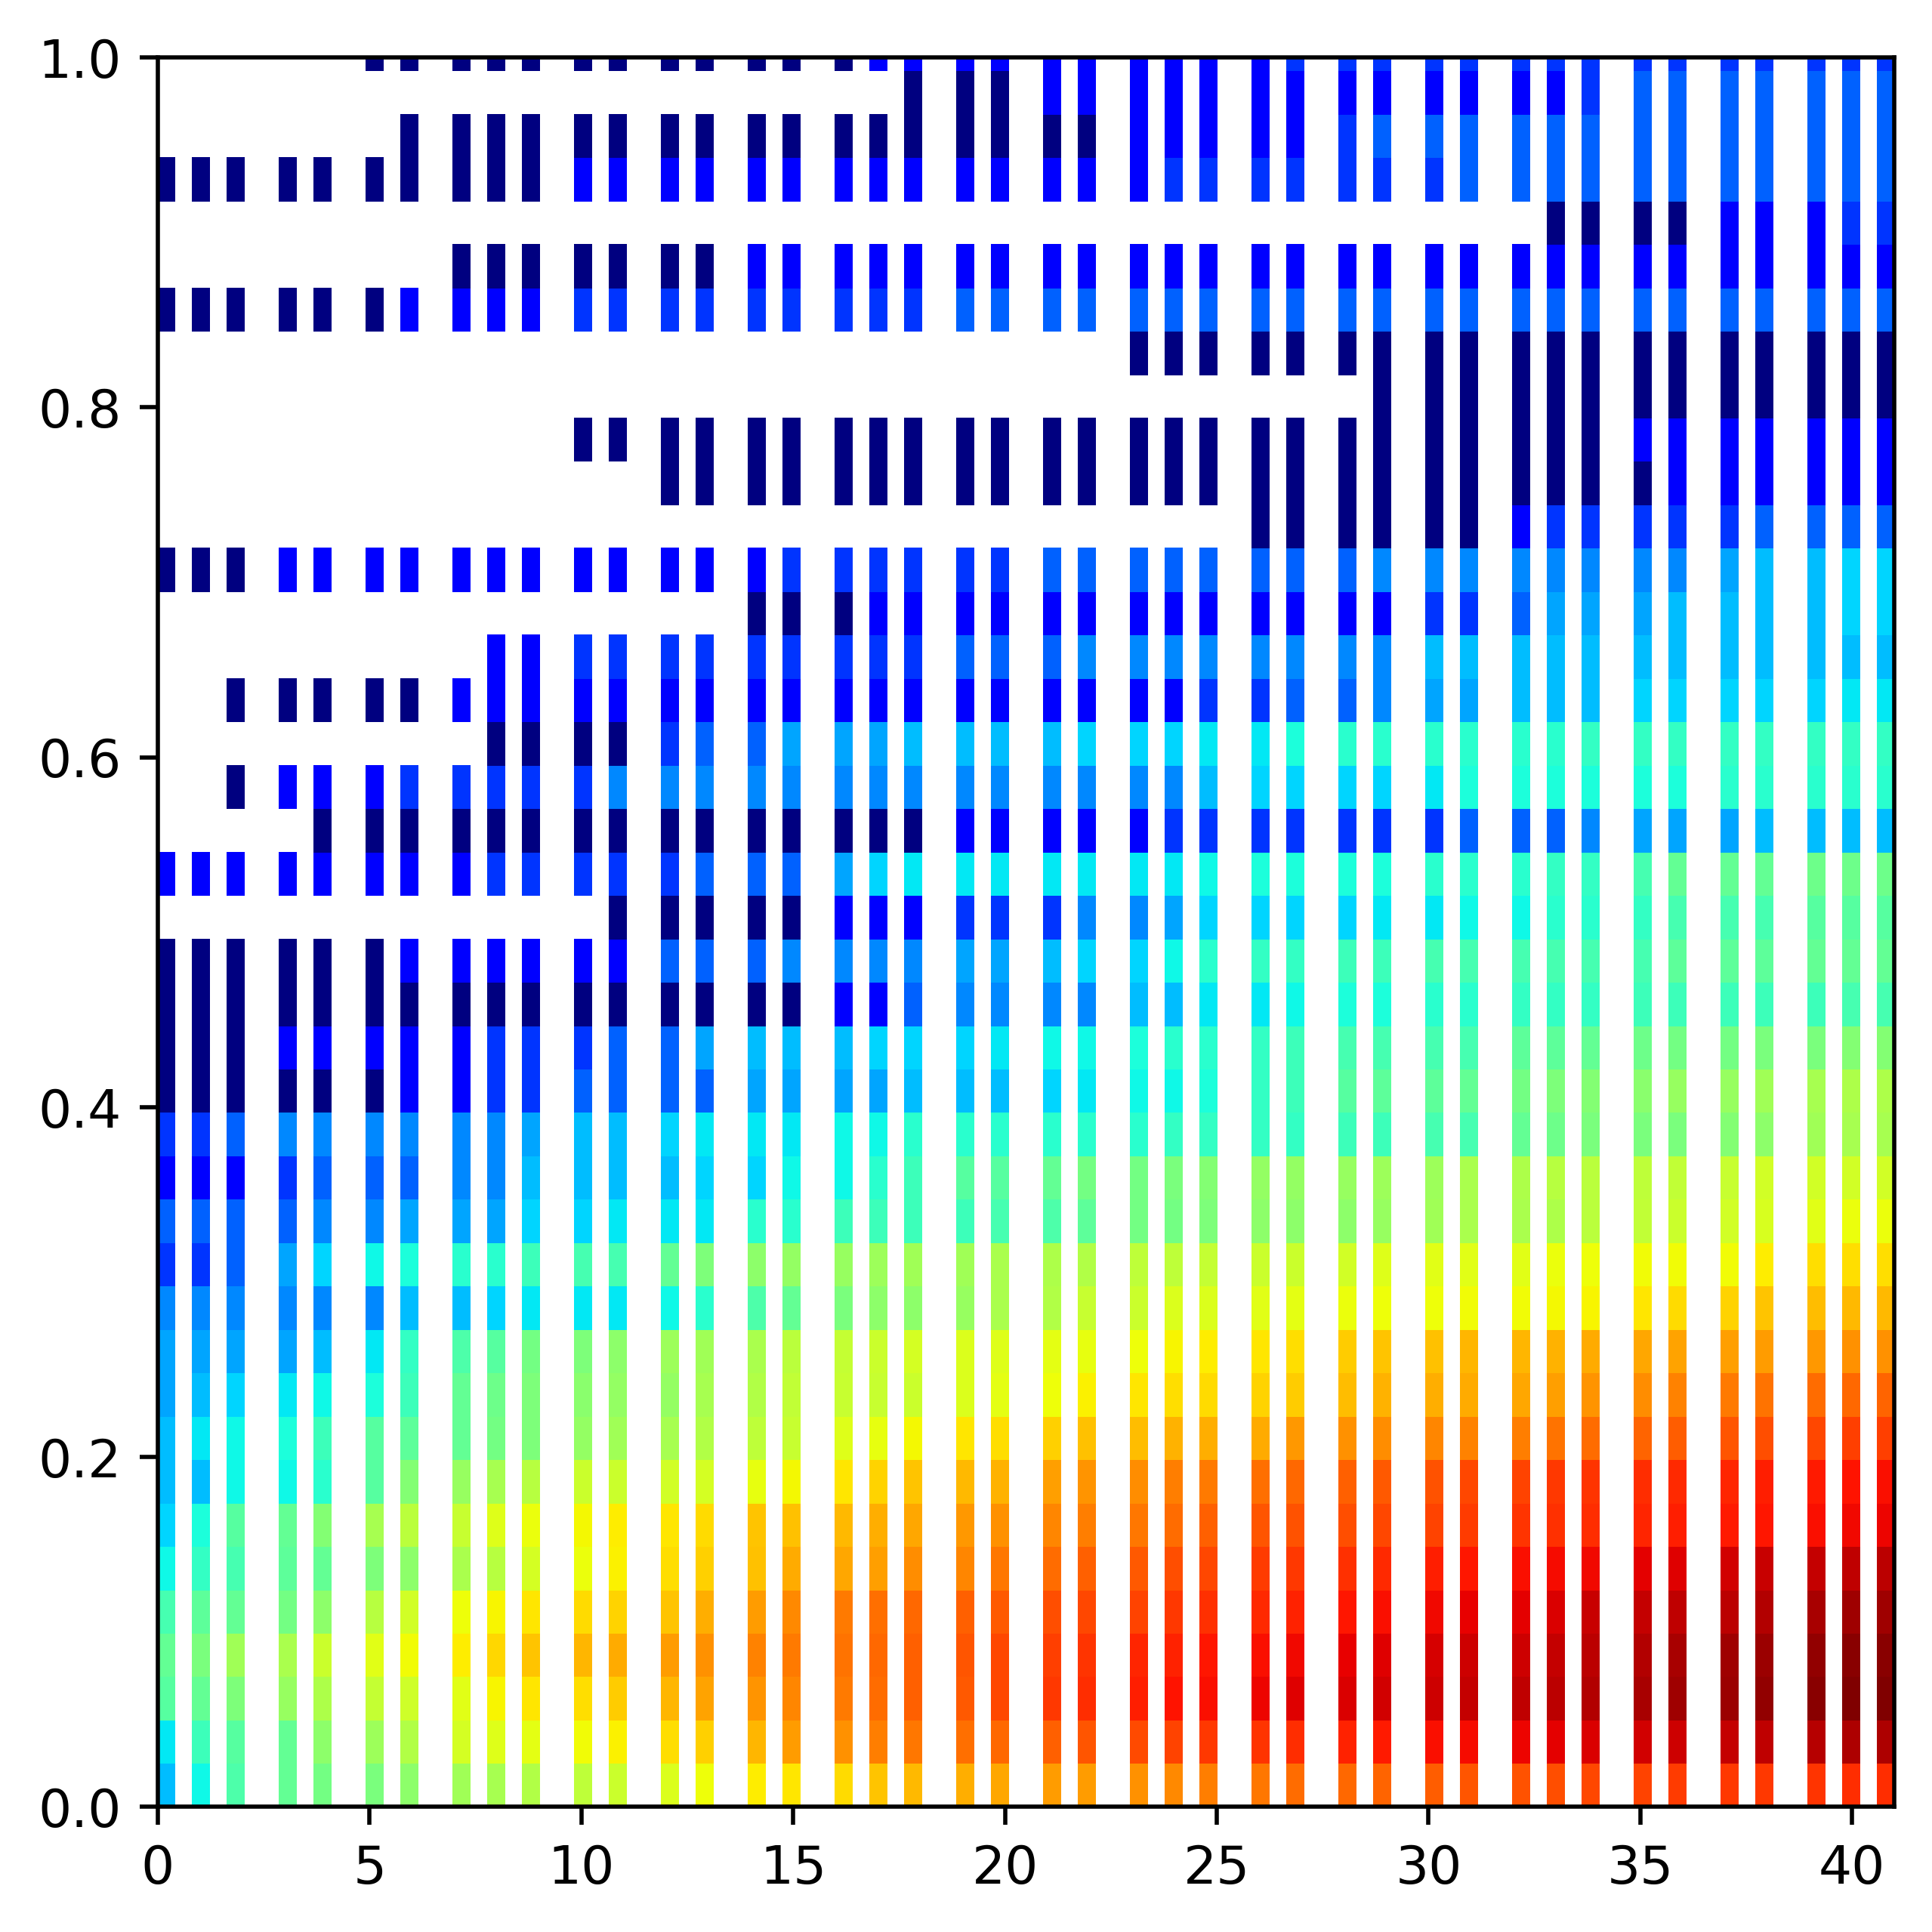

In [18]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(5,5), dpi=500)
sc = ax.hist2d(df_boundaries['boundary'],
                df_boundaries['separation'], 
                bins=100,
                 norm=mpl.colors.LogNorm(),
                 alpha=1,
                 density=True,
                 cmap='jet')
plt.ylim([0,1])
plt.savefig('/Users/cynashirazinejad/Desktop/real02.png')